In [24]:
import tensorflow
import keras
from tensorflow.keras import Layer,Sequential
from keras.layers import Dense,Flatten

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 17s 1us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [8]:
# 1 st image
X_train[0].shape

(28, 28)

In [9]:
import matplotlib.pyplot as plt

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

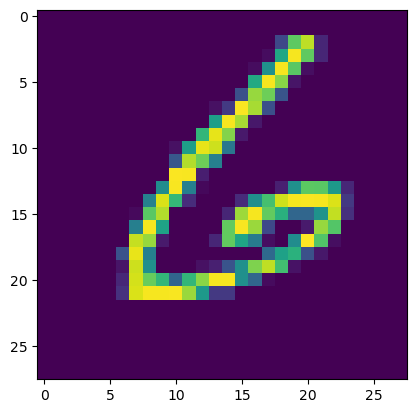

In [16]:
plt.imshow(X_train[-2])

## set range between 0 to 1

In [20]:
X_train=X_train/255


In [21]:
X_test=X_test/255

In [22]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [27]:
model=Sequential()

In [32]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [56]:
hist=model.fit(X_train,y_train,20,validation_split=0.2)

2400/2400 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9850 - loss: 0.0491 - val_accuracy: 0.9742 - val_loss: 0.0896


In [37]:
y_log=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [47]:
y_pred=y_log.argmax(axis=1)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,y_pred)

0.964

In [50]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [51]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

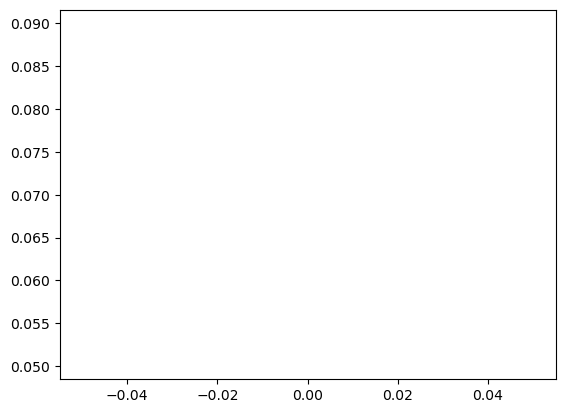

In [57]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

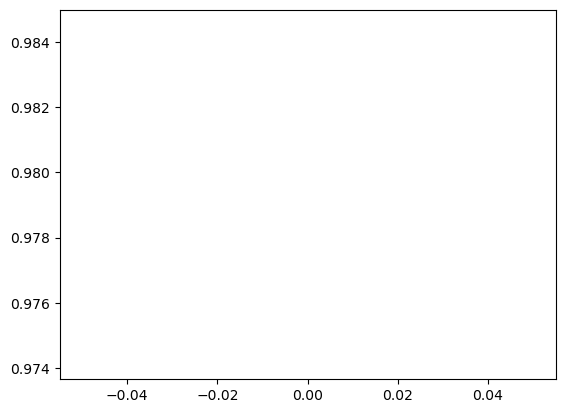

In [58]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

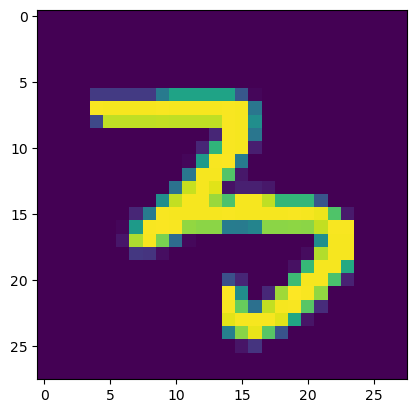

In [67]:
plt.imshow(X_test[2300])

In [68]:
model.predict(X_test[2300].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([3], dtype=int64)